In [ ]:
!conda install pytorch==1.10.1 -y

In [183]:
import numpy as np
np.set_printoptions(suppress=True)
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
plt.style.use('seaborn-white')
import pandas as pd
from typing import Optional
from numpy.typing import NDArray
from copy import deepcopy
from joblib import Parallel, delayed
import torch
import morl
from env_Minecart_deterministic import MinecartDeterministicEnv

<ipython-input-183-d1b407b91dad>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


In [2]:
with open('allRs.pkl', 'rb') as f:
    allRs = pickle.load(f)

with open('all_T.pkl', 'rb') as f:
    all_T = pickle.load(f)

In [3]:
allRs.shape, all_T.shape

((5, 2000, 3), (5, 2000))

# Identify Pareto frontier

In [4]:
%%time
R_checklist = []
for i in range(5):
    R_checklist += [morl.check_pf(allRs[i])]

CPU times: user 33.4 s, sys: 0 ns, total: 33.4 s
Wall time: 33.4 s


In [5]:
np.shape(R_checklist)

(5, 2000)

In [6]:
%%time
_R = np.vstack([allRs[i][R_checklist[i]] for i in range(5)])
_R_check = morl.check_pf(_R)
R_pf = _R[_R_check]

CPU times: user 1.14 s, sys: 0 ns, total: 1.14 s
Wall time: 1.14 s


In [7]:
R_pf.shape

(88, 3)

In [9]:
R_uni = np.unique((R_pf * 10000).astype(int), axis=0) * 1e-4
R_uni, R_uni.shape

(array([[ 0.    ,  0.    , -0.3599],
        [ 0.    ,  0.8   , -0.9799],
        [ 0.    ,  1.5   , -1.0799],
        [ 0.28  ,  1.22  , -1.2599],
        [ 0.3499,  1.1499, -1.5599],
        [ 0.4   ,  0.6   , -0.8399],
        [ 0.4   ,  1.1   , -1.5399],
        [ 0.4199,  1.08  , -1.4799],
        [ 0.6   ,  0.8999, -1.0999],
        [ 0.6499,  0.85  , -1.2999],
        [ 0.6999,  0.8   , -1.5599],
        [ 0.75  ,  0.75  , -0.8999],
        [ 0.8   ,  0.    , -0.9999],
        [ 0.8   ,  0.6999, -1.8599],
        [ 0.85  ,  0.6499, -1.3999],
        [ 0.8999,  0.6   , -1.0799],
        [ 1.08  ,  0.4199, -1.8199],
        [ 1.1   ,  0.4   , -1.3799],
        [ 1.1499,  0.3499, -1.6399],
        [ 1.22  ,  0.28  , -1.3199],
        [ 1.5   ,  0.    , -1.0399]]),
 (21, 3))

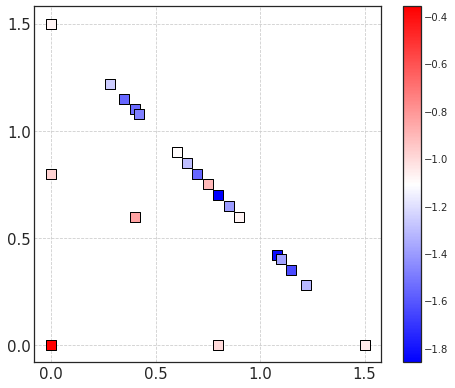

In [12]:
plt.figure(figsize=(6.7, 5.5))
plt.tick_params(labelsize=15)
plt.xlim(-0.08, 1.58); plt.ylim(-0.08, 1.58)
ax = plt.gca()
_x = 1.0
ax.set_facecolor((_x, _x, _x))
plt.grid(True, linestyle='--')
plt.xticks([0, 0.5, 1, 1.5]); plt.yticks([0, 0.5, 1, 1.5])
plt.scatter(R_uni[:, 0], R_uni[:, 1], c=R_uni[:, -1], cmap='bwr', edgecolors='k', s=100, marker='s')
plt.colorbar()
plt.tight_layout()
# plt.savefig('minecart_pf.png', dpi=500)

Returns will no ores

In [16]:
np.sum([x[0] + x[1] < 1e-3 for x in allRs.reshape(5 * 2000, 3)])

8357

# Distribution of episode lengths

In [19]:
np.sum(all_T == 1000)

8236

In [22]:
T_pf = []
for i in range(5):
    T_pf += list(all_T[i][R_checklist[i]])
T_pf = np.array(T_pf)
T_pf.shape

(247,)

In [23]:
T_pf

array([24, 35, 33, 72, 29, 20, 17, 33, 18, 28, 21, 28, 33, 29, 29, 28, 20,
       33, 29, 33, 22, 20, 28, 28, 28, 22, 22, 28, 19, 28, 20, 25, 22, 20,
       26, 36, 27, 27, 27, 20, 27, 27, 27, 27, 17, 13, 27, 27, 22,  9, 27,
       27, 16, 18, 27, 17, 20,  9,  9, 18, 27, 27, 18, 20, 20, 27, 25, 17,
       20, 40, 34, 18, 26, 17, 20, 27, 27, 18, 26,  9, 20, 16,  9, 18, 18,
       27, 16, 35, 20, 20, 27, 18,  9, 27, 27, 18, 27, 17, 27, 27, 27, 19,
       39, 27, 20, 11, 29, 20, 24, 11, 21, 18, 24, 24, 19, 11, 32, 11, 11,
       20, 18, 19, 27, 24, 33, 11, 24, 19, 24, 24, 36, 11, 11, 19, 11, 22,
       33, 11, 11, 16, 23, 11, 27, 11, 18, 33, 31, 11, 25, 19, 11, 11, 23,
       30, 31, 19, 19, 24, 28, 20, 14, 20, 28, 23, 24, 13, 19, 30, 19, 19,
       13, 20, 24, 13, 13, 20, 21, 19, 20, 20, 25, 13, 19, 19, 20, 20, 24,
       20, 13, 22, 24, 27, 24, 19, 13, 29, 15, 17, 27, 20, 35,  8, 25,  8,
       25,  8, 53, 22, 34, 40, 25,  8, 35,  8,  8,  8, 29, 25,  8, 22,  8,
       25,  8, 20,  8, 27

In [26]:
np.mean(all_T.ravel()[all_T.ravel() < 1000]), np.std(all_T.ravel()[all_T.ravel() < 1000])

(27.972789115646258, 20.622933399901)

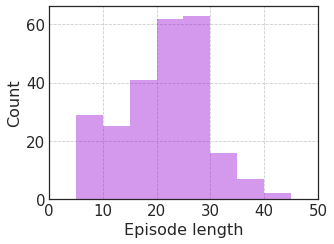

In [69]:
plt.figure(figsize=(4.75, 3.5))
plt.xlim(0, 50)
plt.tick_params(labelsize=15)

plt.hist(T_pf, bins=np.arange(0, 51, 5), alpha=0.4, color='darkviolet')[-1]

plt.grid(True, linestyle='--')
plt.ylabel('Count', fontsize=16)
plt.xlabel('Episode length', fontsize=16)
plt.tight_layout()
# plt.savefig('minecart_ep_len.png', dpi=500)

# Trajectory

In [72]:
with open('out_5.pkl', 'rb') as f:
    nice_policy = pickle.load(f)[2]

In [74]:
def NORM(s: NDArray):
    return np.array([s[0], s[1], 
                     s[2] * 30, 
                     s[3] / 360, 
                     s[4] / 1.5, s[5] / 1.5])

In [181]:
def run_episode_w_last_state_included(policy, env, c: NDArray, 
                                      deterministic: bool, n_obj: int, gamma: float):
    assert  0.0 < gamma <= 1.0
    trajectory = []
    env = deepcopy(env)
    s = env.reset()
    ep_ret = np.zeros(n_obj)
    count = 0
    with torch.no_grad():
        while True:
            if deterministic:
                a = policy.mean(X=torch.Tensor(np.atleast_2d(s)), c=c)
            else:
                a = policy.sample(X=torch.Tensor(np.atleast_2d(s)), c=c)
            
            if not isinstance(a, int):
                a = a.cpu().numpy().ravel()
                    
            trajectory += [np.hstack([s, a])]
            s, r, done, _ = env.step(a)
            ep_ret += r * gamma ** count
            count += 1
            if done:
                trajectory += [np.hstack([s, -1])]
                break
    return ep_ret, np.vstack(trajectory)

def group_evaluation_w_last_state_included(policy, group_size: int, n_jobs: int, env, 
                                           deterministic: bool, n_obj: int, gamma: float, seed: Optional[int] = None):
    if seed is None:
        cs = np.random.uniform(size=(group_size, policy.c_dim))
    else:
        cs = np.random.RandomState(seed).uniform(size=(group_size, policy.c_dim))
        
    c_policy = deepcopy(policy).to('cpu') if policy is not None else None
    record = Parallel(n_jobs=n_jobs)(delayed(run_episode_w_last_state_included)(*(c_policy, env, c, deterministic, n_obj, gamma)) for c in cs)
    return cs, record

In [184]:
%%time
TEST_SIZE = 2500
cs, record = group_evaluation_w_last_state_included(policy=nice_policy, 
                                                    group_size=TEST_SIZE, n_jobs=15, 
                                                    env=MinecartDeterministicEnv().set_normalizer(normalizer=NORM).set_ep_len(100), 
                                                    seed=2976, deterministic=True, n_obj=3, gamma=1.0)
Rs = np.array([x[0] for x in record])

/opt/conda/lib/python3.8/site-packages/gym/spaces/box.py:127: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")


CPU times: user 5.88 s, sys: 458 ms, total: 6.34 s
Wall time: 14.7 s


In [185]:
cs.shape, len(record), Rs.shape

((2500, 3), 2500, (2500, 3))

In [186]:
%%time
pf_idx = morl.check_pf(Rs)

CPU times: user 8.32 s, sys: 0 ns, total: 8.32 s
Wall time: 8.32 s


In [187]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=10, random_state=0)
km.fit(Rs[pf_idx])

KMeans(n_clusters=10, random_state=0)

In [188]:
km.labels_

array([5, 6, 7, 0, 6, 0, 1, 0, 8, 4, 2, 1, 0, 2, 0, 0, 0, 4, 1, 0, 3, 0,
       1, 0, 2, 0, 7, 6, 0, 3, 0, 6, 0, 0, 7, 3, 6, 0, 4, 0, 0, 0, 0, 0,
       0, 0, 5, 0, 0, 1, 0, 3, 9, 0, 0, 0, 0, 2, 4, 6, 7], dtype=int32)

In [189]:
km.cluster_centers_

array([[ 0.        , -0.        , -0.35999999],
       [ 0.64999999,  0.85000001, -1.30399998],
       [ 1.24250001,  0.2575    , -1.50499997],
       [ 0.40000001,  0.60000002, -0.83999998],
       [ 0.3625    ,  1.13750002, -1.59499997],
       [ 0.        ,  0.80000001, -1.03999998],
       [ 0.84999998,  0.65000002, -1.09999998],
       [ 0.89500003,  0.60499998, -1.83999997],
       [ 0.        ,  1.5       , -1.23999998],
       [ 0.80000001,  0.        , -0.97999998]])

In [251]:
def INV_NORM(s: NDArray):
    return np.array([s[0], s[1], 
                     s[2] / 30, 
                     s[3] * 360, 
                     s[4] * 1.5, s[5] * 1.5])

In [281]:
CLUSTER = 1
IDX = np.random.RandomState(12).choice(np.arange(len(km.labels_))[km.labels_ == CLUSTER])
IDX = np.arange(len(Rs))[pf_idx][IDX]
print(IDX, Rs[IDX])
traj_s = np.array([INV_NORM(x) for x in record[IDX][1][:, :-1]])
traj_a = record[IDX][1][:, -1].astype(int)
print(cs[IDX])

810 [ 0.64999998  0.85000002 -1.29999998]
[0.87090394 0.46417099 0.00092655]


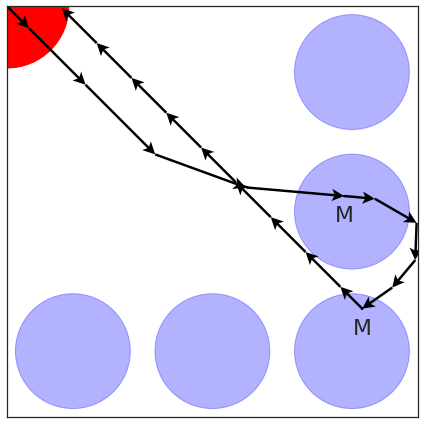

In [282]:
fig = plt.figure(figsize=(6, 6))
ax = fig.gca()
plt.xlim(0, 1)
plt.ylim(1, 0)
plt.tick_params(labelleft=False, labelbottom=False)
circle1 = plt.Circle((0, 0), 0.15, color='r')
mine1 = plt.Circle((0.16, 0.84), 0.14, color='b', alpha=0.3)
mine2 = plt.Circle((0.5, 0.84), 0.14, color='b', alpha=0.3)
mine3 = plt.Circle((0.84, 0.84), 0.14, color='b', alpha=0.3)
mine4 = plt.Circle((0.84, 0.5), 0.14, color='b', alpha=0.3)
mine5 = plt.Circle((0.84, 0.16), 0.14, color='b', alpha=0.3)
ax.add_patch(circle1)
ax.add_patch(mine1)
ax.add_patch(mine2)
ax.add_patch(mine3)
ax.add_patch(mine4)
ax.add_patch(mine5)

x = traj_s[:, 0]
y = traj_s[:, 1]
plt.quiver(x[:-1], y[:-1], x[1:] - x[:-1], y[1:] - y[:-1], 
           scale_units='xy', angles='xy', scale=1, 
           headwidth=5, headlength=5, width=0.006, headaxislength=4)

for i in range(len(traj_a)):
    a = traj_a[i]
    act = 'M' if a == 0 else None
    if act is not None:
        plt.annotate(text=act, xy=np.array([x[i]-0.022, y[i]+0.062]), fontsize=22)

plt.tight_layout()
plt.savefig('minecart_traj_1.png', dpi=500)

In [283]:
CLUSTER = 3
IDX = np.random.RandomState(12).choice(np.arange(len(km.labels_))[km.labels_ == CLUSTER])
IDX = np.arange(len(Rs))[pf_idx][IDX]
print(IDX, Rs[IDX])
traj_s = np.array([INV_NORM(x) for x in record[IDX][1][:, :-1]])
traj_a = record[IDX][1][:, -1].astype(int)
print(cs[IDX])

2177 [ 0.40000001  0.60000002 -0.83999998]
[0.31471917 0.03019363 0.09615134]


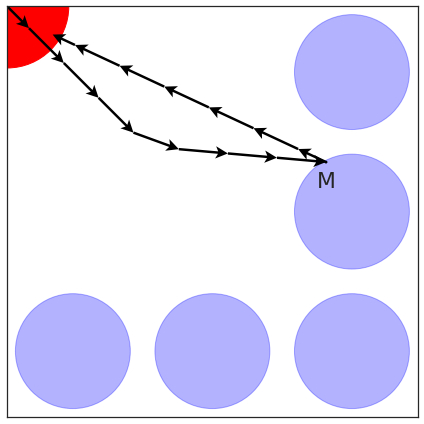

In [284]:
fig = plt.figure(figsize=(6, 6))
ax = fig.gca()
plt.xlim(0, 1)
plt.ylim(1, 0)
plt.tick_params(labelleft=False, labelbottom=False)
circle1 = plt.Circle((0, 0), 0.15, color='r')
mine1 = plt.Circle((0.16, 0.84), 0.14, color='b', alpha=0.3)
mine2 = plt.Circle((0.5, 0.84), 0.14, color='b', alpha=0.3)
mine3 = plt.Circle((0.84, 0.84), 0.14, color='b', alpha=0.3)
mine4 = plt.Circle((0.84, 0.5), 0.14, color='b', alpha=0.3)
mine5 = plt.Circle((0.84, 0.16), 0.14, color='b', alpha=0.3)
ax.add_patch(circle1)
ax.add_patch(mine1)
ax.add_patch(mine2)
ax.add_patch(mine3)
ax.add_patch(mine4)
ax.add_patch(mine5)

x = traj_s[:, 0]
y = traj_s[:, 1]
plt.quiver(x[:-1], y[:-1], x[1:] - x[:-1], y[1:] - y[:-1], 
           scale_units='xy', angles='xy', scale=1, 
           headwidth=5, headlength=5, width=0.006, headaxislength=4)

for i in range(len(traj_a)):
    a = traj_a[i]
    act = 'M' if a == 0 else None
    if act is not None:
        plt.annotate(text=act, xy=np.array([x[i]-0.022, y[i]+0.062]), fontsize=22)

plt.tight_layout()
plt.savefig('minecart_traj_2.png', dpi=500)

In [285]:
CLUSTER = 4
IDX = np.random.RandomState(11).choice(np.arange(len(km.labels_))[km.labels_ == CLUSTER])
IDX = np.arange(len(Rs))[pf_idx][IDX]
print(IDX, Rs[IDX])
traj_s = np.array([INV_NORM(x) for x in record[IDX][1][:, :-1]])
traj_a = record[IDX][1][:, -1].astype(int)
print(cs[IDX])

589 [ 0.28        1.22000003 -1.37999998]
[0.65585068 0.38359305 0.13956056]


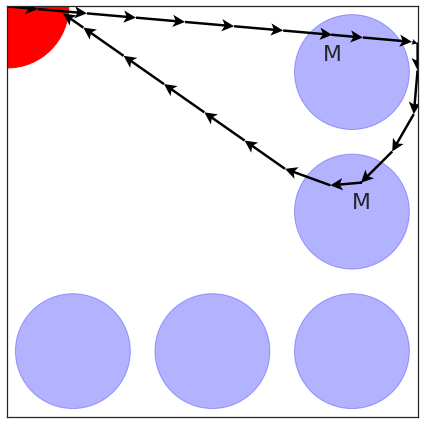

In [286]:
fig = plt.figure(figsize=(6, 6))
ax = fig.gca()
plt.xlim(0, 1)
plt.ylim(1, 0)
plt.tick_params(labelleft=False, labelbottom=False)
circle1 = plt.Circle((0, 0), 0.15, color='r')
mine1 = plt.Circle((0.16, 0.84), 0.14, color='b', alpha=0.3)
mine2 = plt.Circle((0.5, 0.84), 0.14, color='b', alpha=0.3)
mine3 = plt.Circle((0.84, 0.84), 0.14, color='b', alpha=0.3)
mine4 = plt.Circle((0.84, 0.5), 0.14, color='b', alpha=0.3)
mine5 = plt.Circle((0.84, 0.16), 0.14, color='b', alpha=0.3)
ax.add_patch(circle1)
ax.add_patch(mine1)
ax.add_patch(mine2)
ax.add_patch(mine3)
ax.add_patch(mine4)
ax.add_patch(mine5)

x = traj_s[:, 0]
y = traj_s[:, 1]
plt.quiver(x[:-1], y[:-1], x[1:] - x[:-1], y[1:] - y[:-1], 
           scale_units='xy', angles='xy', scale=1, 
           headwidth=5, headlength=5, width=0.006, headaxislength=4)

for i in range(len(traj_a)):
    a = traj_a[i]
    act = 'M' if a == 0 else None
    if act is not None:
        plt.annotate(text=act, xy=np.array([x[i]-0.022, y[i]+0.062]), fontsize=22)

plt.tight_layout()
plt.savefig('minecart_traj_3.png', dpi=500)